In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,619150,1,0,76561198167039852,109,1,1,11.9,"October 30, 2021","Have been playing it for few hours, I am addic..."
1,619150,0,0,the_only_true_burner,134,2,1,11.5,"October 25, 2021",Nice machine learning-themed puzzle game
2,619150,0,0,76561198132722073,42,3,1,5.6,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...
3,619150,0,0,Cha0sbreaker,479,6,1,13.7,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact..."
4,619150,0,0,76561199070175442,21,11,1,9.8,"October 15, 2021",I love this game! I know it's not real program...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1,0,1,11.9,"October 30, 2021","Have been playing it for few hours, I am addic..."
1,0,0,1,11.5,"October 25, 2021",Nice machine learning-themed puzzle game
2,0,0,1,5.6,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...
3,0,0,1,13.7,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact..."
4,0,0,1,9.8,"October 15, 2021",I love this game! I know it's not real program...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,11.9,1
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,11.5,1
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,5.6,1
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,13.7,1
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,9.8,1
5,"October 14, 2021","This is a short, charming little teaching game...",0,0,12.4,1
6,"October 10, 2021",Picked the game up a while ago and have been e...,0,0,12.8,1
7,"October 7, 2021",Cool game. Just remember to save every so often.,0,0,19.7,1
8,"October 6, 2021","#include <stdio.h>int main (void){ printf(""...",2,0,2.9,1
9,"October 3, 2021",J'ai teste la premiere heure de jeu dans une v...,1,0,3.4,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  1500 non-null   object 
 1   Review_Text     1496 non-null   object 
 2   Num_Helpful     1500 non-null   int64  
 3   Num_Funny       1500 non-null   int64  
 4   Hours_Played    1500 non-null   float64
 5   Recommend       1500 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 70.4+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30536/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,11.9,1,1635552000
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,11.5,1,1635120000
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,5.6,1,1634860800
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,13.7,1,1634428800
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,9.8,1,1634256000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30536/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,11.9,1,1635552000,2704
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,11.5,1,1635120000,2703
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,5.6,1,1634860800,2703
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,13.7,1,1634428800,2702
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,9.8,1,1634256000,2702


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,11.9,1,1635552000,2704
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,11.5,1,1635120000,2703
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,5.6,1,1634860800,2703
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,13.7,1,1634428800,2702
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,9.8,1,1634256000,2702


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 30, 2021","Have been playing it for few hours, I am addic..."
1,2703,"October 25, 2021",Nice machine learning-themed puzzle game
2,2703,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...
3,2702,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact..."
4,2702,"October 15, 2021",I love this game! I know it's not real program...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2584,"July 14, 2019",2
1,2584,"July 15, 2019",8
2,2584,"July 16, 2019",4
3,2584,"July 17, 2019",2
4,2585,"July 19, 2019",10
...,...,...,...
577,2702,"October 15, 2021",1
578,2702,"October 17, 2021",1
579,2703,"October 22, 2021",1
580,2703,"October 25, 2021",1


<AxesSubplot:>

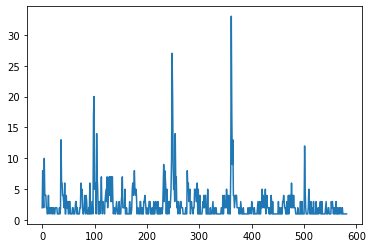

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

1500

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

2.577319587628866

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2584,16
1,2585,26
2,2586,12
3,2587,7
4,2588,3
...,...,...
114,2700,6
115,2701,2
116,2702,3
117,2703,2


<AxesSubplot:>

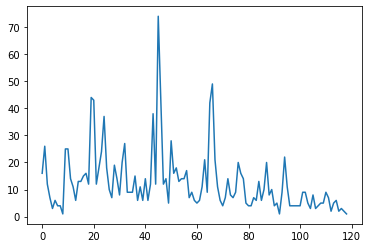

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

1500

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

12.605042016806722

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,11.9,1,1635552000,2704
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,11.5,1,1635120000,2703
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,5.6,1,1634860800,2703
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,13.7,1,1634428800,2702
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,9.8,1,1634256000,2702


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2584,4
1,2585,0
2,2586,3
3,2587,29
4,2588,3
...,...,...
114,2700,7
115,2701,0
116,2702,0
117,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2584,2,0,0.0,0.250000
2585,0,0,0.0,0.000000
2586,2,0,0.0,0.250000
2587,29,0,0.0,4.142857
2588,2,0,1.0,1.000000
...,...,...,...,...
2700,2,1,1.0,1.166667
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

2343

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

1.562

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2584,0
1,2585,0
2,2586,1
3,2587,3
4,2588,0
...,...,...
114,2700,0
115,2701,0
116,2702,0
117,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2584,0,0,0.0,0.000000
2585,0,0,0.0,0.000000
2586,1,0,0.0,0.083333
2587,3,0,0.0,0.428571
2588,0,0,0.0,0.000000
...,...,...,...,...
2700,0,0,0.0,0.000000
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

271

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.18066666666666667

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2584,149.2
1,2585,334.0
2,2586,156.9
3,2587,66.1
4,2588,66.1
...,...,...
114,2700,27.4
115,2701,32.5
116,2702,35.9
117,2703,17.1


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2584,15.9,3.6,9.15,9.325000
2585,26.8,3.2,11.20,12.846154
2586,29.3,1.3,12.55,13.075000
2587,22.3,1.6,5.40,9.442857
2588,40.1,5.9,20.10,22.033333
...,...,...,...,...
2700,10.6,1.5,3.15,4.566667
2701,19.7,12.8,16.25,16.250000
2702,13.7,9.8,12.40,11.966667


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

17488.9

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

11.65926666666666

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2584,1.000000
1,2585,1.000000
2,2586,0.666667
3,2587,0.714286
4,2588,1.000000
...,...,...
114,2700,1.000000
115,2701,1.000000
116,2702,1.000000
117,2703,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2584,1,1,1.0,1.000000
2585,1,1,1.0,1.000000
2586,1,-1,1.0,0.666667
2587,1,-1,1.0,0.714286
2588,1,1,1.0,1.000000
...,...,...,...,...
2700,1,1,1.0,1.000000
2701,1,1,1.0,1.000000
2702,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

1230

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.82

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,11.9,1,1635552000,2704
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,11.5,1,1635120000,2703
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,5.6,1,1634860800,2703
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,13.7,1,1634428800,2702
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,9.8,1,1634256000,2702


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,0.019105,1.0,1.000000,2704
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,0.018452,1.0,0.994041,2703
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,0.008818,1.0,0.990465,2703
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,0.022044,1.0,0.984505,2702
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,0.015676,1.0,0.982122,2702
...,...,...,...,...,...,...,...,...
1495,"May 9, 2021",I loved the game and the resources given for e...,0,0,0.006205,1.0,0.792610,2679
1496,"May 7, 2021",Get to learn a bit about machine learning from...,0,0,0.022208,1.0,0.790226,2679
1497,"May 7, 2021",I love this puzzle game... Since I am from I.T...,0,0,0.002286,1.0,0.790226,2679
1498,"May 6, 2021",Yes,0,0,0.004572,1.0,0.789035,2679


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30536/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021","Have been playing it for few hours, I am addic...",1,0,0.019105,1.0,1.000000,2704
1,"October 25, 2021",Nice machine learning-themed puzzle game,0,0,0.018452,1.0,0.994041,2703
2,"October 22, 2021",Thanks for the good game!Nice puzzles and cute...,0,0,0.008818,1.0,0.990465,2703
3,"October 17, 2021","Longtime fan of games like TIS-100, Infinifact...",0,0,0.022044,1.0,0.984505,2702
4,"October 15, 2021",I love this game! I know it's not real program...,0,0,0.015676,1.0,0.982122,2702
5,"October 14, 2021","This is a short, charming little teaching game...",0,0,0.019922,1.0,0.980930,2702
6,"October 10, 2021",Picked the game up a while ago and have been e...,0,0,0.020575,1.0,0.976162,2701
7,"October 7, 2021",Cool game. Just remember to save every so often.,0,0,0.031842,1.0,0.972586,2701
8,"October 6, 2021","#include <stdio.h>int main (void){ printf(""...",2,0,0.004409,1.0,0.971395,2700
9,"October 3, 2021",J'ai teste la premiere heure de jeu dans une v...,1,0,0.005225,1.0,0.967819,2700


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2584    [Great game very fun and informative, Great ga...
2585    [Great game. Totally recommend., Very interest...
2586    [two thumbs up !, This game is great if you co...
2587    [The good :+ Challenging, but not frustrating+...
2588    [This game is actually really fun to play. It ...
2589    [Fun. I definitely did not spend 4 hours tryin...
2590    [Not bad, I spent ten minutes on this game pow...
2591    [Fun game about programming, learning and with...
2592    [Fun puzzle game with cool machine learning in...
2593    [This game is really cool there should be seco...
2594    [This seems to be a reasonably good puzzle gam...
2595    [It is really relaxing and you learn more abou...
2596    [Top-notch., nice game. play for hours. can't ...
2597    [Trying to make people learn and have fun on t...
2598    [Great intro to a variety of ML concepts and s...
2599    [Great puzzles!, 5 cats out of 5., A game that...
2600    [Very informative, which  was just what I was ..

In [52]:
# storing data in JSON format
df_text_list.to_json('whiletrue_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('whiletrue_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2584  [Great game very fun and informative, Great ga...
1    Review_Text   2585  [Great game. Totally recommend., Very interest...
2    Review_Text   2586  [two thumbs up !, This game is great if you co...
3    Review_Text   2587  [The good :+ Challenging, but not frustrating+...
4    Review_Text   2588  [This game is actually really fun to play. It ...
5    Review_Text   2589  [Fun. I definitely did not spend 4 hours tryin...
6    Review_Text   2590  [Not bad, I spent ten minutes on this game pow...
7    Review_Text   2591  [Fun game about programming, learning and with...
8    Review_Text   2592  [Fun puzzle game with cool machine learning in...
9    Review_Text   2593  [This game is really cool there should be seco...
10   Review_Text   2594  [This seems to be a reasonably good puzzle gam...
11   Review_Text   2595  [It is really relaxing and you learn more abou...
12   Review_Text   2596  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('whiletrue_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30536/2370536352.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('whiletrue_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30536/2509285791.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('whiletrue_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])